<a href="https://colab.research.google.com/github/Malka82/College/blob/main/Copy_of_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [ ]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [ ]:
def answer_one():
    
    # Your code here
    df = pd.read_csv('https://raw.githubusercontent.com/niallomahony93/MLDIoT_Practical1/master/Assignment2/fraud_data.csv')

    return df['Class'].sum()/len(df['Class'])
    


In [ ]:
answer_one()

0.016410823768035772

In [ ]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/niallomahony93/MLDIoT_Practical1/master/Assignment2/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [ ]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    from sklearn.metrics import accuracy_score
    
    # Your code here

    dmc = DummyClassifier(strategy='most_frequent')
    dmc.fit(X_train, y_train)
    y_p = dmc.predict(X_test)
    acc = accuracy_score(y_p, y_test)
    recall = recall_score(y_p, y_test)
    return (acc, recall)
    
    
    # to get accuracy_score, for example, call accuracy_score(y_predicted, y_test)

In [ ]:
answer_two()

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [ ]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score, accuracy_score
    from sklearn.svm import SVC

    # Your code here
    svc = SVC()
    svc = svc.fit(X_train, y_train)
    y_p = svc.predict(X_test)
    acc = accuracy_score(y_p, y_test)
    recall = recall_score(y_p, y_test)
    precision = precision_score(y_p, y_test)
    return (acc, recall, precision)

In [ ]:
answer_three()

(0.9900442477876106, 0.9333333333333333, 0.35)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [ ]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    # Your code here
    svc = SVC(C = 1e9, gamma = 1e-07 )
    svc = svc.fit(X_train, y_train)
    scores = svc.decision_function(X_test)
    # implement a threshold: y_pred_with_threshold = scores > -220
    y_pred_with_threshold = scores > -220
    # implement a confusion matrix: confusion = confusion_matrix(y_test, y_pred_with_threshold)
    confusion = confusion_matrix(y_test, y_pred_with_threshold)
    
    return confusion

In [ ]:
answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Repeat for a second classifier of your choice, e.g. random forest, SVC, etc.

Compare the plots of the PR curve and ROC curve for each against each other.

For the Logistic Regression model:

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [ ]:
from sklearn.linear_model import LogisticRegression
    
lr = LogisticRegression(max_iter = 10000)
lr.fit(X_train, y_train)
y_scores_lr = lr.decision_function(X_test)

In [ ]:
#create a second classifier of your choice

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc = rfc.fit(X_train, y_train)
y_scores_rfc = rfc.predict_proba(X_test)[:, 1]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


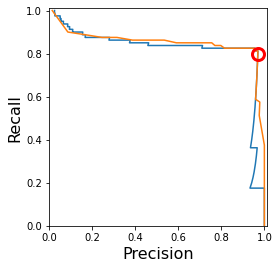

In [ ]:
def draw_pr_curve():
    from sklearn.metrics import precision_recall_curve

    precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
    closest_zero = np.argmin(np.abs(thresholds))
    closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero]

    #repeat for second classifier (give different names)
    precision_rfc, recall_rfc, thresholds_rfc = precision_recall_curve(y_test, y_scores_rfc)
    closest_zero_rfc = np.argmin(np.abs(thresholds))
    closest_zero_p_rfc = precision[closest_zero_rfc]
    closest_zero_r_rfc = recall[closest_zero_rfc]

    import matplotlib.pyplot as plt
    
    # Your code to plot curve here
    import matplotlib.pyplot as plt
    plt.figure()
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall, label='Precision-Recall Curve')
    plt.plot(precision_rfc, recall_rfc, label='Precision-Recall Curve')

    #repeat for second classifier

    plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
    
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    plt.axes().set_aspect('equal')
    plt.show()

draw_pr_curve()

In [ ]:
def draw_roc_curve():
    %matplotlib inline
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, auc

    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
    roc_auc_lr = auc(fpr_lr, tpr_lr)

     #repeat for second classifier (give different names)
    
    # Your code to plot curve here
draw_roc_curve()

In [ ]:
def answer_five():
        
    # Your code here
    
    #return (______, ______)

    

SyntaxError: ignored

In [ ]:
def answer_five():
        
    # FYI heres how to find the exact values programatically
    
        
    # Your code here
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import roc_curve

    lr = LogisticRegression().fit(X_train, y_train)
    
    y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
    
#     lr_predicted = lr.predict(X_test)
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
    closest_zero_p = np.argmin(np.abs(precision-0.75))
#     closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero_p]
    
#     print(closest_zero_r)
    
    
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
#     roc_auc_lr = auc(fpr_lr, tpr_lr)
    
    closest_zero_fpr_lr = np.argmin(np.abs(fpr_lr - 0.16))
#     closest_zero_p = precision[closest_zero]
    closest_zero_tpr_lr = recall[closest_zero_fpr_lr]
    
#     print(closest_zero_tpr_lr)

    
#     y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
    
#     confusion = confusion_matrix(y_test, lr_predicted)

    ans = (closest_zero_r, closest_zero_tpr_lr)
    
    return ans
answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [ ]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # Your code here
    clf = LogisticRegression(max_iter = 10000, solver='liblinear')
    #fill out the grid of parameters we want to search
    grid_values = {'penalty': [########], 'C':[###############]}
    
    grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, scoring = 'recall', cv=3)
    grid_clf_acc.fit(X_train, y_train)
    
    return grid_clf_acc.cv_results_['mean_test_score'].reshape(-1, 2)

In [ ]:
r = answer_six()

In [ ]:
r

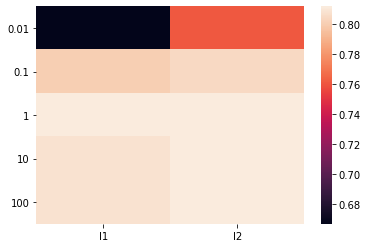

In [ ]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib inline
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())